In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import regions
from astropy.table import *
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS

In [3]:
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### vos commands for downloading from CANFAR

getCert

vcp vos:[imLoc]  ./ --verbose 

### Processing of new catalogs (from Vincent Picouet)
insert inside_u and inside_us flag (NOT removing FLAG_FIELD_BINARY flag)

In [6]:
# cat_dir = 'clauds_cat_v2020/'  # v2 cat
# version = 'v2_v200930'

# cat_dir = '/Volumes/LejaySSD/v4_cats/'  #v4 cat
# version = 'v4_v201129'

# cat_dir = '/Volumes/LejaySSD/v6_cats/'  #v6 cat
# version = 'v6_v201223'

cat_dir = '/Volumes/LejaySSD/v8_cats/'  #v8 cat
version = 'v8_v210116'

for cat_name in ['COSMOS_deep','XMM-LSS_deep','DEEP_deep','ELAIS_deep']:
    print(cat_name)
    cat = Table.read(cat_dir+cat_name+'_'+version+'.fits')
    
    inside_u_col = Column(name='inside_u',data=cat['FLAG_FIELD_BINARY'][:,1])
    inside_us_col = Column(name='inside_uS',data=cat['FLAG_FIELD_BINARY'][:,2])
    
    cat.add_columns([inside_u_col,inside_us_col])
    cat.write(cat_dir+cat_name+'_'+version+'.fits', overwrite=True)

COSMOS_deep
XMM-LSS_deep
DEEP_deep
ELAIS_deep


### load catalogs

In [5]:
# useful params catalogs

cat_name = 'COSMOS_deep'
cat_a = Table.read('CUT_deep_catalogs/s16a_'+cat_name+'_masterCat.fits')
cat_t = Table.read('CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_'+cat_name+'.fits')
cat_v2 = Table.read('/Volumes/LejaySSD/v2_cats/'+cat_name+'_v2_v200930.fits')
cat_v4 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v4_gal_cut_params.fits')
cat_v6 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v6_gal_cut_params.fits')
cat_v8 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v8_gal_cut_params.fits')

In [9]:
# total number of objects

print("Anneya's catalog", len(cat_a))
print("Thibaud's catalog", len(cat_t))
print("Vincent's v2 catalog", len(cat_v2))
print("Vincent's v4 catalog", len(cat_v4))
print("Vincent's v6 catalog", len(cat_v6))
print("Vincent's v8 catalog", len(cat_v8))

Anneya's catalog 1441537
Thibaud's catalog 1777967
Vincent's v2 catalog 3229118
Vincent's v4 catalog 2743065
Vincent's v6 catalog 2749999
Vincent's v8 catalog 2843481


### compare v2,v4,v6 and v8 catalogs

In [6]:
# select galaxies
cat_v2_gal =  cat_v2[cat_v2['OBJ_TYPE'] == 0]
cat_v4_gal =  cat_v4[cat_v4['OBJ_TYPE'] == 0]
cat_v6_gal =  cat_v6[cat_v6['OBJ_TYPE'] == 0]
cat_v8_gal =  cat_v8[cat_v8['OBJ_TYPE'] == 0]

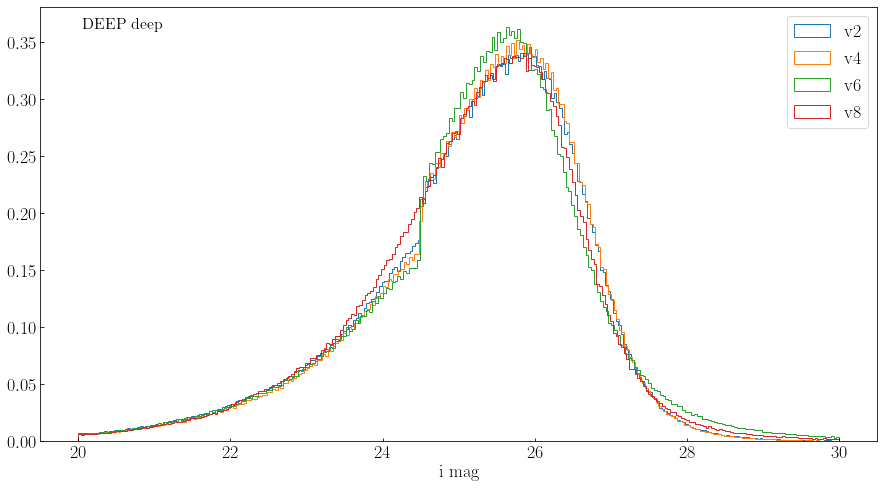

In [11]:
fig = plt.figure(figsize=(15,8))

plt.hist(cat_v2_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v2')
plt.hist(cat_v4_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v4')
plt.hist(cat_v6_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v6')
plt.hist(cat_v8_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v8')

plt.xlabel('i mag',fontsize=18)
plt.annotate(cat_name.replace('_',' '),xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=18)
plt.show()

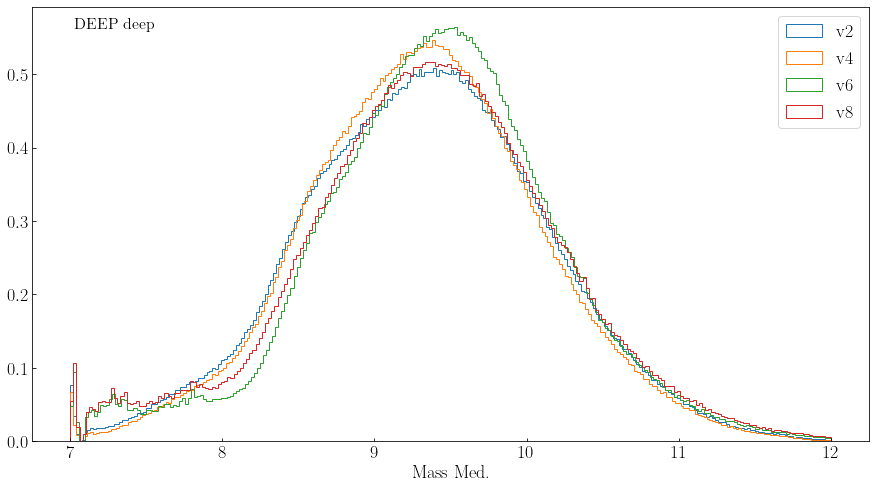

In [12]:
fig = plt.figure(figsize=(15,8))

plt.hist(cat_v2_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v2')
plt.hist(cat_v4_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v4')
plt.hist(cat_v6_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v6')
plt.hist(cat_v8_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v8')

plt.xlabel('Mass Med.',fontsize=18)
plt.annotate(cat_name.replace('_',' '),xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=18)
plt.show()

Text(0, 0.5, '$\\log sSFR$')

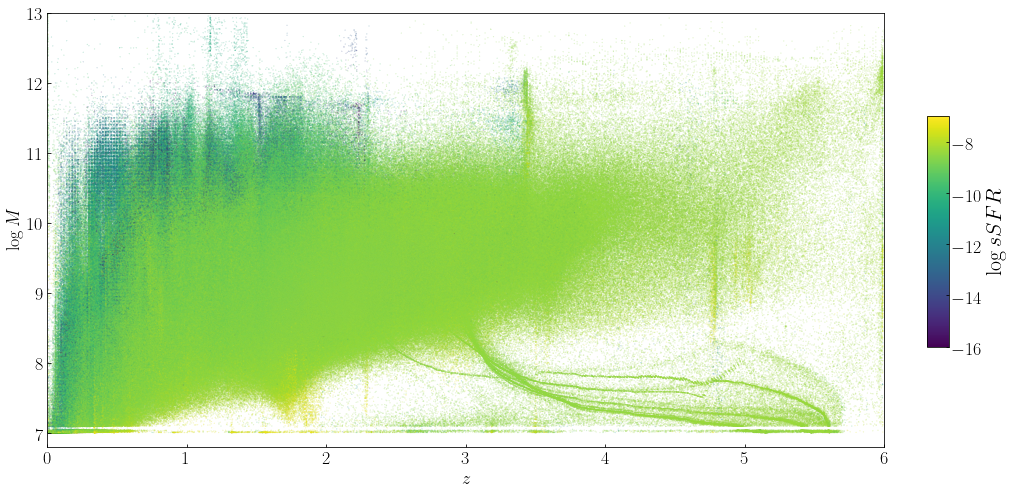

In [16]:
# mass vs z plot
fig = plt.figure(figsize=(15,8))
im = plt.scatter(cat_v8_gal['ZPHOT'],cat_v8_gal['MASS_MED'],s=0.01,c=cat_v8_gal['SSFR_MED'],vmin=-16,vmax=-7)
plt.xlim([0,6])
plt.ylim([6.8,13])

plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$\log M$', fontsize=18)

cb_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$\log sSFR$',fontsize=22)

In [95]:
cat_v6_full = Table.read('/Volumes/LejaySSD/v6_cats/DEEP_deep_v6_v201223.fits')
cat_v6_full = cat_v6_full['RA','DEC','Z_ML','Z_BEST','ZPHOT','MASS_MED','OBJ_TYPE']
cat_v6_gal_full =  cat_v6_full[cat_v6_full['OBJ_TYPE'] == 0]

Text(0, 0.5, '$z_{PHOT}$')

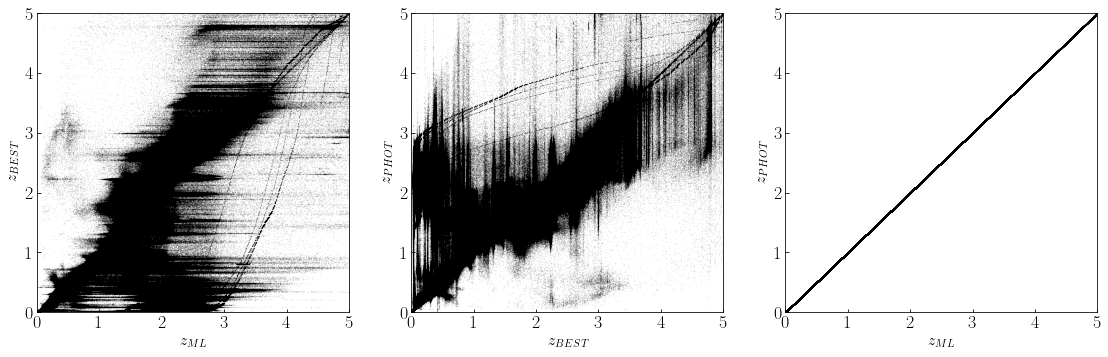

In [101]:
# z_ml  z_best photoz comparison
fig, axs = plt.subplots(1, 3, figsize=(19,5.5))

# z_ml vs z_best
axs[0].scatter(cat_v6_gal_full['Z_ML'],cat_v6_gal_full['Z_BEST'],s=0.05,color='k',alpha=0.1)
axs[0].set_xlim([0,5])
axs[0].set_ylim([0,5])
axs[0].set_xlabel(r'$z_{ML}$',fontsize=16)
axs[0].set_ylabel(r'$z_{BEST}$',fontsize=16)

# z_best vs photoz
axs[1].scatter(cat_v6_gal_full['Z_BEST'],cat_v6_gal_full['ZPHOT'],s=0.05,color='k',alpha=0.1)
axs[1].set_xlim([0,5])
axs[1].set_ylim([0,5])
axs[1].set_xlabel(r'$z_{BEST}$',fontsize=16)
axs[1].set_ylabel(r'$z_{PHOT}$',fontsize=16)

# z_ml vs photoz
axs[2].scatter(cat_v6_gal_full['Z_ML'],cat_v6_gal_full['ZPHOT'],s=0.05,color='k',alpha=0.1)
axs[2].set_xlim([0,5])
axs[2].set_ylim([0,5])
axs[2].set_xlabel(r'$z_{ML}$',fontsize=16)
axs[2].set_ylabel(r'$z_{PHOT}$',fontsize=16)

### catalog comparison
anneya's, vincent's v8 (v3 in COSMOS_uddd)

In [13]:
fig = plt.figure(figsize=(12,8))

plt.scatter(cat_t_gal['zKDEPeak'], cat_t_gal['MASS_MED'],s=0.1,alpha=0.1,c='r')
plt.scatter(cat_v4_gal['Z_BEST'], cat_v4_gal['MASS_MED'],s=0.1,alpha=0.1,c='k')
plt.xlim([-0.02,1.1])
plt.ylim([7,12.3])

plt.xlabel('redshift',fontsize=20)
plt.ylabel(r'$\log(M/M_\odot)$',fontsize=20)

NameError: name 'cat_t_gal' is not defined

<Figure size 864x576 with 0 Axes>

###  catalog comparison with COSMOS2015 / COSMOS2020
anneya's, vincent's v2, v4 and v6 (v3 in COSMOS_uddd)

1. compare mass and redshift

In [19]:
import os

In [21]:
# compare v8 with cosmos2015

cat_v_name = 'clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v8_gal_cut_params.fits'

#2015
# cosmos_name = 'COSMOS2015_Laigle+_v1.1.fits'
# combined_cat_name = 'COSMOS2015_Laigle_Vincent_added.fits'

#2020
cosmos_name = 'photoz_cosmos2020_lephare_classic_v1.8.out.fits'
combined_cat_name = 'COSMOS2020_Laigle_Vincent_added.fits'

# matching
if '2015' in cosmos_name:
    cmd = 'java -jar stilts.jar tmatch2 in1='+cat_v_name + \
                ' in2='+cosmos_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name
else:
    cmd = 'java -jar stilts.jar tmatch2 in1='+cat_v_name + \
                ' in2='+cosmos_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="alpha delta" out='+combined_cat_name
    
os.system(cmd)
print(cmd)


# keep useful parameters
cat=Table.read(combined_cat_name)

if '2015' in cosmos_name:
    useful_params = ['Z_BEST','ZPHOT','Z_ML','ZPDF','MASS_MED_1','MASS_MED_2','SSFR_MED_1','i','g','inside_u','inside_uS','OBJ_TYPE']
    cat = cat[useful_params]
    cat.rename_column('SSFR_MED_1','SSFR_MED')
    cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
    cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
    cat.write(combined_cat_name, overwrite=True)
else:
    useful_params = ['Z_BEST','ZPHOT','Z_ML','zPDF','MASS_MED_1','mass_med_2','SSFR_MED_1','i','g','inside_u','inside_uS','OBJ_TYPE']
    cat = cat[useful_params]
    cat.rename_column('SSFR_MED_1','SSFR_MED')
    cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
    cat.rename_column('mass_med_2','MASS_MED_COSMOS')  # mass from COSMOS2020
    cat.rename_column('zPDF','ZPDF')  
    cat.write(combined_cat_name, overwrite=True)    

java -jar stilts.jar tmatch2 in1=clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v8_gal_cut_params.fits in2=photoz_cosmos2020_lephare_classic_v1.8.out.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="alpha delta" out=COSMOS2020_Laigle_Vincent_added.fits


In [105]:
# compare cat_a with cosmos2015

cat_a_name = 'CUT_deep_catalogs/s16a_COSMOS_deep_masterCat.fits'
cat_2015_name = 'COSMOS2015_Laigle+_v1.1.fits'
combined_cat_name = 'COSMOS2015_Laigle_Anneya_added.fits'
# matching
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_a_name + \
                ' in2='+cat_2015_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name

os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cat_name)
useful_params = ['zKDEPeak','zKDEMedian','ZPDF','MASS_MED_1','MASS_MED_2','SSFR_MED_1','i','g','inside','preds_median']
cat = cat[useful_params]
cat.rename_column('SSFR_MED_1','SSFR_MED')
cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
cat.write(combined_cat_name, overwrite=True)

java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/s16a_COSMOS_deep_masterCat.fits in2=COSMOS2015_Laigle+_v1.1.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=COSMOS2015_Laigle_Anneya_added.fits


In [110]:
# compare cat_t with cosmos2015

cat_t_name = 'CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_COSMOS_deep.fits'
cat_2015_name = 'COSMOS2015_Laigle+_v1.1.fits'
combined_cat_name = 'COSMOS2015_Laigle_Thibaud_added.fits'
# matching
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_t_name + \
                ' in2='+cat_2015_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name

os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cat_name)
useful_params = ['Z_BEST_BC03','ZPDF','MASS_MED_1','MASS_MED_2','SSFR_MED_1','i','CLASS_1']
cat = cat[useful_params]
cat.rename_column('SSFR_MED_1','SSFR_MED')
cat.rename_column('CLASS_1','CLASS')
cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
cat.write(combined_cat_name, overwrite=True)

java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_COSMOS_deep.fits in2=COSMOS2015_Laigle+_v1.1.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=COSMOS2015_Laigle_Thibaud_added.fits


plot comparison results

Text(0, 0.5, 'MASS MED COSMOS')

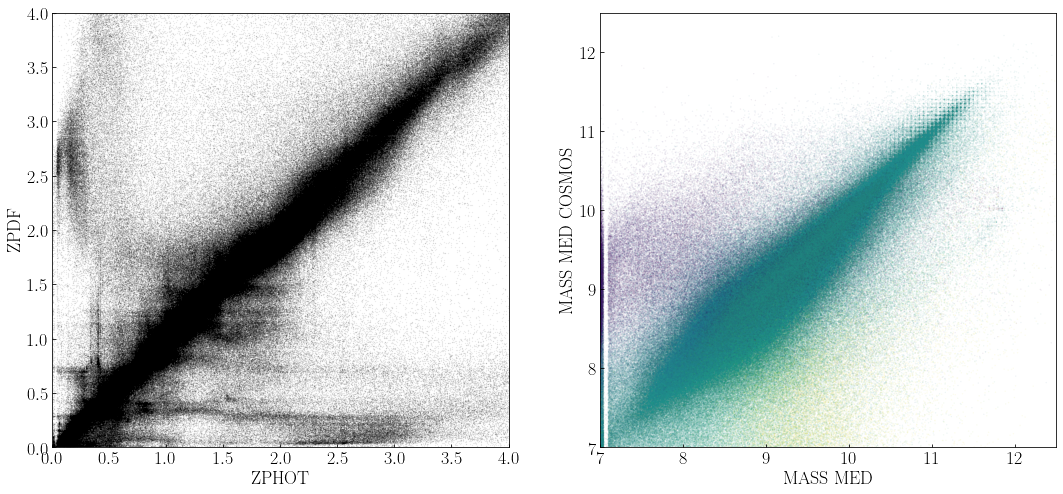

In [8]:
cat = Table.read('COSMOS2020_Laigle_Vincent_added.fits')

# select galaxies with inside flag

# z/mass comparison
fig, axs = plt.subplots(1, 2, figsize=(18,8))

# z
axs[0].scatter(cat['ZPHOT'],cat['ZPDF'],s=0.1,color='k',alpha=0.1)
axs[0].set_xlim([0,4])
axs[0].set_ylim([0,4])
axs[0].set_xlabel('ZPHOT',fontsize=18)
axs[0].set_ylabel('ZPDF',fontsize=18)

# mass
axs[1].scatter(cat['MASS_MED'],cat['MASS_MED_COSMOS'],s=0.1,c=cat['Z_BEST']-cat['ZPDF'],alpha=0.1,vmin=-3,vmax=3)
axs[1].set_xlim([7,12.5])
axs[1].set_ylim([7,12.5])
axs[1].set_xlabel('MASS MED',fontsize=18)
axs[1].set_ylabel('MASS MED COSMOS',fontsize=18)

(6.8, 13)

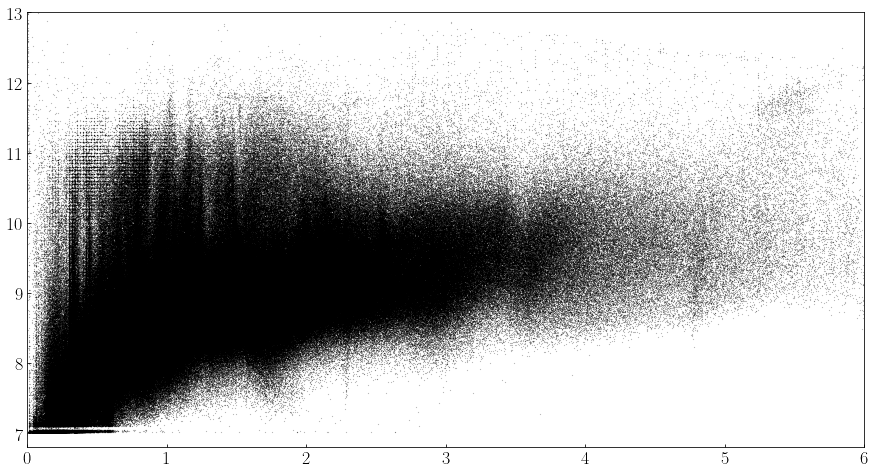

In [9]:
# mass vs z plot
fig = plt.figure(figsize=(15,8))
plt.scatter(cat['ZPHOT'],cat['MASS_MED'],s=0.01,color='k')
plt.xlim([0,6])
plt.ylim([6.8,13])

### mass vs.  magnitude (at certain z)

1. the catalog: v6 catalog matched with COSMOS2015
2. separates sf/q (sSFR or SVM classification)
3. 0.1 $\Delta z$ bins

1.809000000000001
1.5754999999999981
1.5399999999999991
2.056000000000001
2.4154999999999944
2.6630000000000003


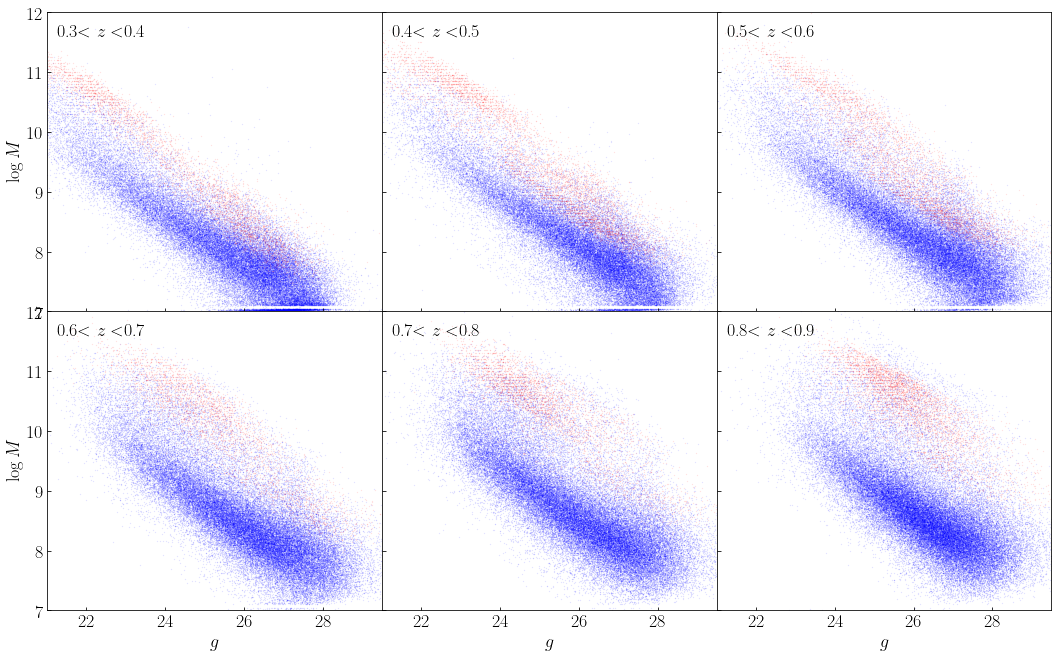

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(18,11),sharey=True, sharex=True)
cat_type = 'cat_v'

# load the catalog
if cat_type == 'cat_a':
    cat = Table.read('COSMOS2015_Laigle_Anneya_added.fits')
    cat = cat[cat['preds_median']<0.89]  # select gals
    z_keyname = 'zKDEPeak'
elif cat_type == 'cat_t':
    cat = Table.read('COSMOS2015_Laigle_Thibaud_added.fits')
    cat = cat[cat['CLASS']==0]  # select gals
    z_keyname = 'Z_BEST_BC03'
else:
    cat = Table.read('COSMOS2020_Laigle_Vincent_added.fits')
    cat = cat[cat['OBJ_TYPE']==0]  # select gals
    z_keyname = 'Z_ML'
# cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v6_gal_cut_params.fits')

for i,z in enumerate([0.35,0.45,0.55,0.65,0.75,0.85]):
    cat_z = cat[abs(cat[z_keyname]-z)<0.05]  # redshift selection
    
    # sf/q separation
    cat_z_sf = cat_z[cat_z['SSFR_MED']>-11]
    cat_z_q = cat_z[cat_z['SSFR_MED']<-11]
    
    # plot 
    row = i // 3
    col = i % 3
    axs[row][col].scatter(cat_z_sf['g'],cat_z_sf['MASS_MED'],s=0.05,c='b',alpha=0.2)
    axs[row][col].scatter(cat_z_q['g'],cat_z_q['MASS_MED'],s=0.05,c='r',alpha=0.2)

#     im = axs[row][col].scatter(cat_z['g'],cat_z['MASS_MED'],s=0.1,c=cat_z[z_keyname]-cat_z['ZPDF'],alpha=0.2,vmin=-3,vmax=3)
    axs[row][col].annotate(str(round(z-0.05,2))+"$<z<$"+str(round(z+0.05,2)),xy=([0.03,0.92]),
                    xycoords='axes fraction',fontsize=18)
    
    # find out delta_median_g between sf/q
    cat_z_sf_9 = cat_z_sf[np.logical_and(cat_z_sf['MASS_MED']>8.9, cat_z_sf['MASS_MED']<9.1)]
    cat_z_q_9 = cat_z_q[np.logical_and(cat_z_q['MASS_MED']>8.9, cat_z_q['MASS_MED']<9.1)]
    print(np.median(cat_z_q_9['g']) - np.median(cat_z_sf_9['g']))
    
# lables and xy_limits
axs[1][0].set_xlabel(r'$g$',fontsize=18)
axs[1][1].set_xlabel(r'$g$',fontsize=18)
axs[1][2].set_xlabel(r'$g$',fontsize=18)
axs[0][0].set_ylabel(r'$\log M$',fontsize=18)
axs[1][0].set_ylabel(r'$\log M$',fontsize=18)
axs[0][0].set_xlim([21,29.5])
axs[0][0].set_ylim([7,12])
fig.subplots_adjust(hspace=0) 
fig.subplots_adjust(wspace=0)
# cb_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
# cbar = fig.colorbar(im, cax=cb_ax)
# cbar.ax.set_ylabel(r'$z_v - z_c$',fontsize=22)
plt.show()

In [26]:
cat_name = 'ELAIS_deep'
cat_stack_dir = '/home/lejay/projects/def-sawicki/lejay/completeness_output_mock_cats/rand_pos/'
cat_stack_name = 'cat_stack_'+cat_name+'.fits'
# match the complteness estimation catalog with physical catalog
cat_phys = '/home/lejay/catalogs/v8_cats/'+cat_name+'_v8_gal_cut_params.fits'  # physical catalog but with only useful parameters
cmd = 'java -jar -Xms128m -Xmx1500m stilts.jar tmatch2 in1='+cat_stack_dir+cat_stack_name + \
     ' in2='+cat_phys+' find=best1 join=all1 matcher=sky params=1 values1="RA_deShift DEC_deShift"' + \
     ' values2="RA'+' DEC'+'" out='+cat_stack_dir+'matched_'+cat_stack_name

print(cmd)

java -jar -Xms128m -Xmx1500m stilts.jar tmatch2 in1=/home/lejay/projects/def-sawicki/lejay/completeness_output_mock_cats/rand_pos/cat_stack_ELAIS_deep.fits in2=/home/lejay/catalogs/v8_cats/ELAIS_deep_v8_gal_cut_params.fits find=best1 join=all1 matcher=sky params=1 values1="RA_deShift DEC_deShift" values2="RA DEC" out=/home/lejay/projects/def-sawicki/lejay/completeness_output_mock_cats/rand_pos/matched_cat_stack_ELAIS_deep.fits


### add sf/q separation for COSMOS2020 / trim the catalog to useful parameters

$NUV-r>3(r-J)+1$

$NUV-r>3.1$

In [34]:
from astropy.table import Column

In [38]:
#2020
cosmos_2020 = Table.read('photoz_cosmos2020_lephare_classic_v1.8.out.fits')

In [42]:
# useful columns
cosmos_2020 = cosmos_2020['Id','alpha','delta','zBEST','zPDF','mask','type','mass_med','SFR_med','sSFR_med',
                          'MNUV','MU','MR','MZ','MJ','MK']

sfq = []
for gal in cosmos_2020:
    if gal['MNUV']<99.  and gal['MR']<99. and gal['MJ']<99.:
        if (gal['MNUV'] - gal['MR'])>3*(gal['MR']-gal['MJ'])+1 and gal['MNUV'] - gal['MR']>3.1:
            sfq.append(0.)
        else:
            sfq.append(1.)
    else:
        sfq.append(-1.)

# add column
sfq_col = Column(name='CLASS',data=sfq)
cosmos_2020.add_column(sfq_col)
cosmos_2020.write('photoz_cosmos2020_lephare_classic_v1.8_SfqAdded.fits',overwrite=True)